In [3]:
import sympy as sp
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import quad


from IPython.display import display
sp.init_printing()
%matplotlib notebook

In [93]:
x = sp.symbols('x', real = True)
f = sp.Function('f')
f(x)

f = sp.log(x)

L1 = 0.1
L2 = np.pi
L = abs(L1-L2)

f_n = sp.lambdify(x,f,'numpy')

In [94]:
# Symbolische coefficienten

In [95]:
'''
x, n = sp.symbols('x n', real = True)
f = sp.Function('f')
f(x)

f = sp.log(x)


L1 = 0  # gebruik hier eventueel sp.pi of sp.exp of ... (dus geen np)
L2 = sp.pi # gebruik hier eventueel sp.pi of sp.exp of ... (dus geen np)
L = abs(L1-L2)
display(L)

n = 10

a = []
b = []

for i in range(n+1):
    if i == 0:
        a_n = 2/L * sp.integrate(f,(x, L1, L2))
        a.append(a_n)
    else:
        a_n = 2/L * sp.integrate(f *sp.sin(2*sp.pi*x*i/L),(x, L1, L2))
        b_n = 2/L * sp.integrate(f *sp.cos(2*sp.pi*x*i/L), (x, L1, L2))
        a.append(a_n)
        b.append(b_n)

display(a)
display(b)

'''



"\nx, n = sp.symbols('x n', real = True)\nf = sp.Function('f')\nf(x)\n\nf = sp.log(x)\n\n\nL1 = 0  # gebruik hier eventueel sp.pi of sp.exp of ... (dus geen np)\nL2 = sp.pi # gebruik hier eventueel sp.pi of sp.exp of ... (dus geen np)\nL = abs(L1-L2)\ndisplay(L)\n\nn = 10\n\na = []\nb = []\n\nfor i in range(n+1):\n    if i == 0:\n        a_n = 2/L * sp.integrate(f,(x, L1, L2))\n        a.append(a_n)\n    else:\n        a_n = 2/L * sp.integrate(f *sp.sin(2*sp.pi*x*i/L),(x, L1, L2))\n        b_n = 2/L * sp.integrate(f *sp.cos(2*sp.pi*x*i/L), (x, L1, L2))\n        a.append(a_n)\n        b.append(b_n)\n\ndisplay(a)\ndisplay(b)\n\n"

In [96]:
# Numerieke berekening van de coefficienten. Dit is nodig voor de plot

In [97]:
def integrate_sin(m):  # m is het kwantumgetal
    # function we want to integrate
    h = lambda x: 2/L*f_n(x) *np.sin(2*np.pi*x*m/L)
    
    # call quad to integrate f from -2 to 2
    res, err = quad(h, L1, L2)
    
    return res

def integrate_cos(m):  # m is het kwantumgetal
    # function we want to integrate
    h = lambda x: 2/L* f_n(x) *np.cos(2*np.pi*x*m/L)
    
    # call quad to integrate f from -2 to 2
    res, err = quad(h, L1, L2)
    
    return res

def integrate_f(i):
    # function we want to integrate
    h = lambda x: 2/L* f_n(x)
    
    # call quad to integrate f from -2 to 2
    res, err = quad(h, L1, L2)
    
    return res
    

In [98]:
aantal = 20

x_vals = np.linspace(L1, L2, 500)
g = np.linspace(0,0,500)

for i in range(aantal):
    if i == 0:
        g = g + (integrate_f(i))/2
    else:
        g = g + integrate_sin(i) * np.sin(2*np.pi*x_vals*i/L)
        g = g + integrate_cos(i) * np.cos(2*np.pi*x_vals*i/L)





In [99]:
# Plot

<IPython.core.display.Javascript object>


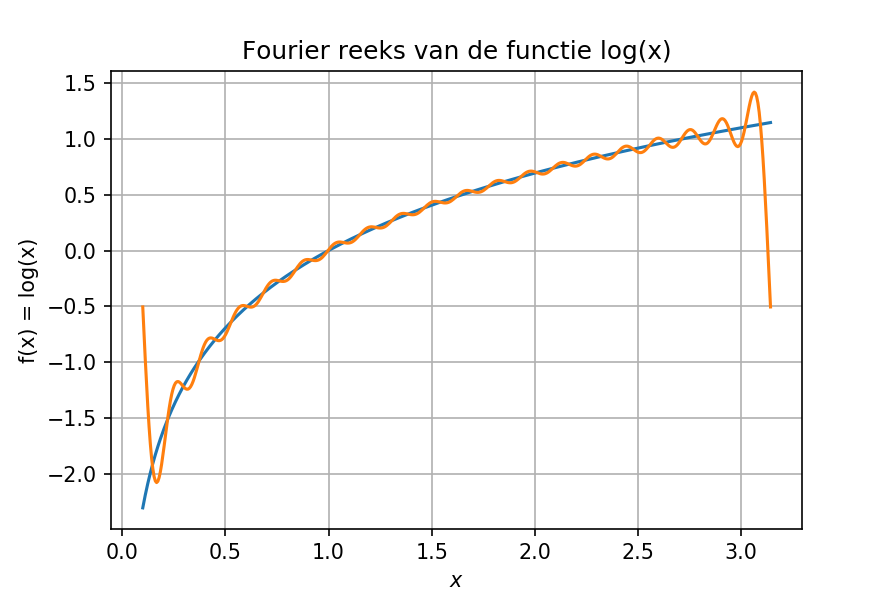

In [100]:
'''

for i in range(len(a)):
    if i == 0:
        g = g + sp.N(a[i])/2
    else:
        g = g + sp.N(a[i]) *sp.sin(2*sp.pi*i*x/L)
for i in range(len(b)):
     g = g + b[i] * sp.cos(2*sp.pi*(i+1)*x/L)


lam_g = sp.lambdify(x, g, modules=['numpy'])
lam_f = sp.lambdify(x, f, modules=['numpy'])

x_vals = np.linspace(L1, L2, 500)
g_vals = lam_g(x_vals)
f_vals = lam_f(x_vals)

'''

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(6, 4))

plt.plot(x_vals,f_n(x_vals))
plt.plot(x_vals, g)
ax.set_title('Fourier reeks van de functie ' + str(f))
ax.grid(True, which = 'both') #Voegt rijen en kolommen toe, zodat de datapunten beter vergeleken en afgelezen kunnen worden.
plt.ylabel('f(x) = ' + str(f), size=10)
plt.xlabel('$x$', size=10)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


In [ ]:
# Heat equation or Diffusion equation

In [5]:
x, t, n= sp.symbols('x t n', real = True)

f = x**2

L0 = 0

L = 10

c = 1

X = sp.sin(n*sp.pi*x/L)     # voorlopig moet dit nog theoretisch op papier bepaald worden aan de hand van de randvoorwaarden

T = sp.exp(-n**2 * c*sp.pi**2/L**2 * t)

k = 20

psi = 0


for i in range(1, k+1):
    X_i = X.replace(n, i)
    T_i = T.replace(n, i)
    A_n = sp.N(sp.integrate(f*X_i, (x, L0, L))/sp.integrate(X_i**2, (x, L0, L)))
    psi += A_n * X_i * T_i

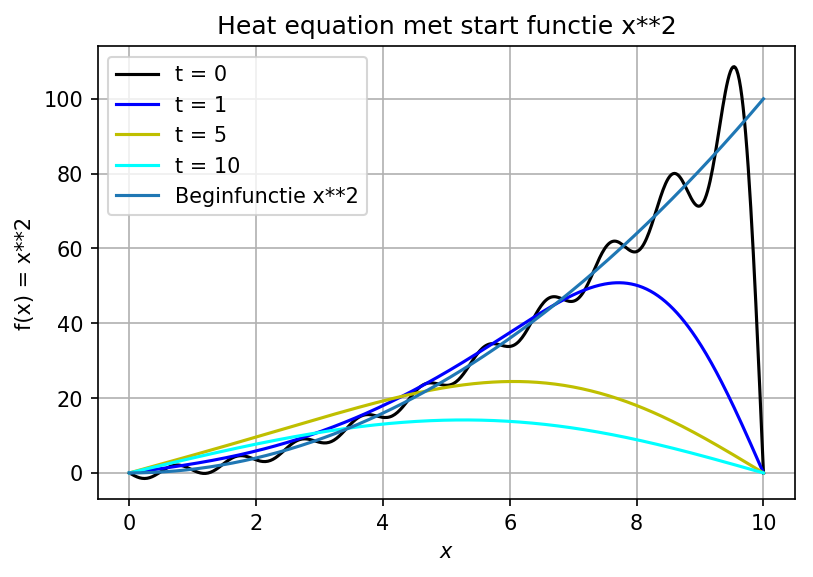

In [97]:
tijd = [0,1,5,10]
kleur = ['k', 'b', 'y', 'cyan', 'r', 'g', 'orange', 'grey', 'purple', 'pink']

x_vals = np.linspace(0, L, 500)

legende = []

for i in range(len(tijd)):
    legende.append('t = ' + str(tijd[i]))

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(6, 4))

for i in range(len(tijd)):
    psi_0 = psi.replace(t, tijd[i])
    lam_psi = sp.lambdify(x, psi_0, modules=['numpy'])
    psi_vals = lam_psi(x_vals)
    plt.plot(x_vals, psi_vals, color = kleur[i], label = legende[i])
    ax.legend()
    
lam_f = sp.lambdify(x, f, modules=['numpy'])
f_vals = lam_f(x_vals)
plt.plot(x_vals,f_vals, label = 'Beginfunctie ' + str(f))
ax.set_title('Heat equation met start functie ' + str(f))
ax.legend()
ax.grid(True, which = 'both') #Voegt rijen en kolommen toe, zodat de datapunten beter vergeleken en afgelezen kunnen worden.
plt.ylabel('f(x) = ' + str(f), size=10)
plt.xlabel('$x$', size=10)
plt.tick_params(axis='both', which='major', labelsize=10)

plt.show() 


In [67]:
# Wave equation

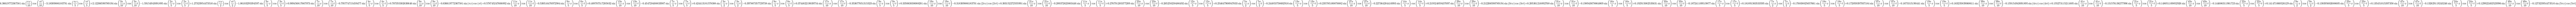

In [102]:
x, t, n= sp.symbols('x t n', real = True)

f = x

g = 0

L0 = 0

L = 10

c = 1

X = sp.sin(n*sp.pi*x/L)     # voorlopig moet dit nog theoretisch op papier bepaald worden aan de hand van de randvoorwaarden

T1 = sp.cos(n*sp.pi*c*t/L)

T2 = sp.sin(n*sp.pi*c*t/L)

k = 50

psi = 0


for i in range(1, k+1):
    X_i = X.replace(n, i)
    T_i_1 = T1.replace(n, i)
    T_i_2 = T2.replace(n, i)
    A_n = sp.N(sp.integrate(f*X_i, (x, L0, L))/sp.integrate(X_i**2, (x, L0, L)))
    B_n = sp.N(sp.integrate(g*X_i, (x, L0, L))/sp.integrate(X_i**2, (x, L0, L)) * L/(c*sp.pi*i))
    psi += ((A_n * T_i_1) + (B_n * T_i_2)) * X_i
display(psi)

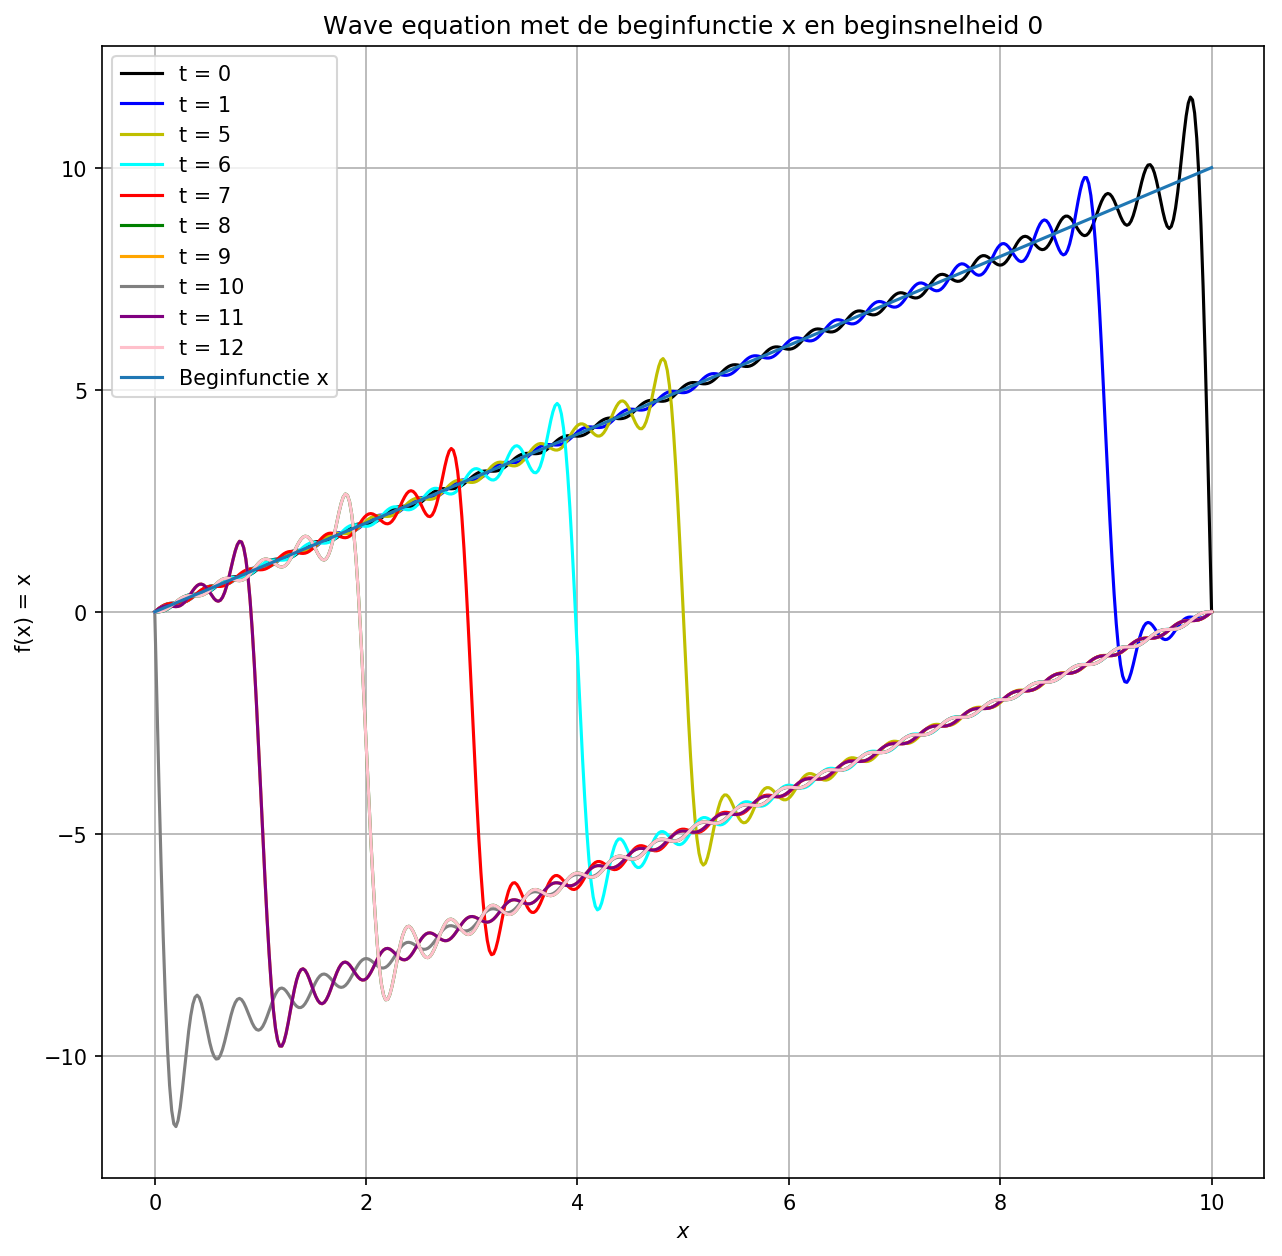

In [103]:
tijd = [0,1,5,6,7, 8, 9, 10,11,12]
kleur = ['k', 'b', 'y', 'cyan', 'r', 'g', 'orange', 'grey', 'purple', 'pink']

x_vals = np.linspace(0, L, 500)

legende = []

for i in range(len(tijd)):
    legende.append('t = ' + str(tijd[i]))

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(10, 10))

for i in range(len(tijd)):
    psi_0 = psi.replace(t, tijd[i])
    lam_psi = sp.lambdify(x, psi_0, modules=['numpy'])
    psi_vals = lam_psi(x_vals)
    plt.plot(x_vals, psi_vals, color = kleur[i], label = legende[i])
    ax.legend()
    
lam_f = sp.lambdify(x, f, modules=['numpy'])
f_vals = lam_f(x_vals)
plt.plot(x_vals,f_vals, label = 'Beginfunctie ' + str(f))
ax.set_title('Wave equation met de beginfunctie ' + str(f) + ' en beginsnelheid ' + str(g))
ax.legend()
ax.grid(True, which = 'both') #Voegt rijen en kolommen toe, zodat de datapunten beter vergeleken en afgelezen kunnen worden.
plt.ylabel('f(x) = ' + str(f), size=10)
plt.xlabel('$x$', size=10)
plt.tick_params(axis='both', which='major', labelsize=10)

plt.show() 


<IPython.core.display.Javascript object>


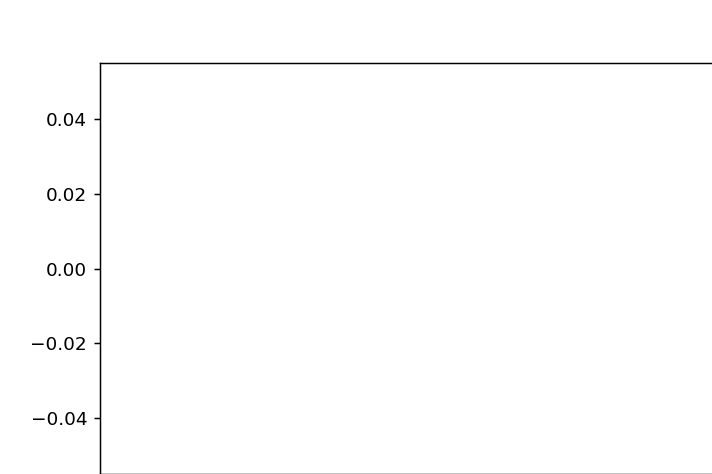

array([ 0.        ,  0.05746559,  0.11474126,  0.17163771,  0.22796689,
        0.28354263,  0.33818126,  0.39170219,  0.44392853,  0.49468768,
        0.54381188,  0.59113876,  0.63651191,  0.67978138,  0.72080415,
        0.75944464,  0.79557515,  0.82907627,  0.85983726,  0.88775648,
        0.91274163,  0.93471015,  0.95358943,  0.96931707,  0.9818411 ,
        0.99112012,  0.99712345,  0.99983128,  0.99923463,  0.99533549,
        0.98814673,  0.97769213,  0.96400623,  0.94713427,  0.927132  ,
        0.90406554,  0.87801112,  0.84905485,  0.81729243,  0.78282884,
        0.74577798,  0.70626231,  0.66441242,  0.62036663,  0.57427051,
        0.52627642,  0.47654296,  0.42523453,  0.37252068,  0.31857564,
        0.2635777 ,  0.20770862,  0.15115307,  0.09409795,  0.03673184,
       -0.02075568, -0.07817459, -0.13533514, -0.1920484 , -0.24812694,
       -0.30338541, -0.35764118, -0.41071494, -0.46243128, -0.51261927,
       -0.56111304, -0.60775232, -0.65238296, -0.69485746, -0.73

array([ 0.        ,  0.05687828,  0.1135724 ,  0.16989881,  0.22567512,
        0.28072075,  0.33485747,  0.38791001,  0.43970658,  0.49007949,
        0.53886565,  0.58590708,  0.63105149,  0.6741527 ,  0.71507117,
        0.75367442,  0.78983744,  0.82344316,  0.85438277,  0.8825561 ,
        0.90787192,  0.93024827,  0.9496127 ,  0.96590251,  0.97906496,
        0.98905743,  0.99584758,  0.99941341,  0.99974337,  0.99683641,
        0.99070194,  0.98135981,  0.96884027,  0.95318386,  0.93444126,
        0.91267318,  0.88795007,  0.860352  ,  0.82996832,  0.79689739,
        0.76124631,  0.72313049,  0.68267335,  0.64000587,  0.59526621,
        0.54859923,  0.50015601,  0.4500934 ,  0.3985735 ,  0.34576312,
        0.29183324,  0.23695847,  0.18131649,  0.12508745,  0.0684534 ,
        0.01159772, -0.04529551, -0.10204209, -0.15845827, -0.21436141,
       -0.2695705 , -0.32390678, -0.37719433, -0.42926061, -0.47993706,
       -0.52905958, -0.57646913, -0.62201222, -0.66554138, -0.70

array([ 0.        ,  0.05630285,  0.11242707,  0.16819461,  0.22342856,
        0.27795367,  0.33159696,  0.38418826,  0.4355607 ,  0.48555132,
        0.53400152,  0.58075758,  0.62567117,  0.6685998 ,  0.70940728,
        0.74796415,  0.78414809,  0.81784429,  0.84894586,  0.87735413,
        0.90297896,  0.92573907,  0.94556225,  0.96238561,  0.97615578,
        0.98682906,  0.99437161,  0.99875948,  0.99997876,  0.99802558,
        0.99290614,  0.98463668,  0.97324344,  0.95876255,  0.94123996,
        0.92073126,  0.89730152,  0.87102507,  0.84198526,  0.81027424,
        0.7759926 ,  0.7392491 ,  0.70016031,  0.65885025,  0.61544997,
        0.57009715,  0.52293569,  0.4741152 ,  0.42379057,  0.37212145,
        0.31927176,  0.26540918,  0.21070458,  0.15533151,  0.09946565,
        0.04328423, -0.01303451, -0.06931189, -0.12536939, -0.18102914,
       -0.23611457, -0.29045093, -0.34386582, -0.39618979, -0.44725683,
       -0.49690495, -0.54497661, -0.59131933, -0.63578606, -0.67

array([ 0.00000000e+00,  5.57389300e-02,  1.11304554e-01,  1.66524105e-01,
        2.21225891e-01,  2.75239832e-01,  3.28397985e-01,  3.80535068e-01,
        4.31488974e-01,  4.81101276e-01,  5.29217715e-01,  5.75688687e-01,
        6.20369701e-01,  6.63121834e-01,  7.03812159e-01,  7.42314159e-01,
        7.78508123e-01,  8.12281513e-01,  8.43529322e-01,  8.72154391e-01,
        8.98067718e-01,  9.21188732e-01,  9.41445545e-01,  9.58775173e-01,
        9.73123734e-01,  9.84446614e-01,  9.92708609e-01,  9.97884029e-01,
        9.99956783e-01,  9.98920426e-01,  9.94778181e-01,  9.87542927e-01,
        9.77237159e-01,  9.63892922e-01,  9.47551705e-01,  9.28264317e-01,
        9.06090729e-01,  8.81099882e-01,  8.53369479e-01,  8.22985742e-01,
        7.90043140e-01,  7.54644100e-01,  7.16898687e-01,  6.76924260e-01,
        6.34845109e-01,  5.90792070e-01,  5.44902113e-01,  4.97317922e-01,
        4.48187447e-01,  3.97663448e-01,  3.45903016e-01,  2.93067086e-01,
        2.39319939e-01,  

array([ 0.        ,  0.05518619,  0.11020419,  0.1648863 ,  0.21906586,
        0.27257775,  0.32525886,  0.37694864,  0.42748953,  0.47672751,
        0.5245125 ,  0.57069887,  0.61514583,  0.65771793,  0.69828541,
        0.73672463,  0.77291843,  0.8067565 ,  0.83813571,  0.86696042,
        0.89314277,  0.91660297,  0.93726951,  0.9550794 ,  0.96997837,
        0.981921  ,  0.99087089,  0.99680077,  0.99969256,  0.99953745,
        0.99633591,  0.9900977 ,  0.98084183,  0.96859652,  0.95339908,
        0.93529583,  0.91434195,  0.89060131,  0.86414626,  0.83505743,
        0.80342348,  0.76934083,  0.73291335,  0.69425206,  0.65347481,
        0.61070588,  0.56607561,  0.51972004,  0.47178044,  0.42240293,
        0.37173801,  0.31994008,  0.26716704,  0.21357971,  0.15934142,
        0.10461749,  0.0495747 , -0.00561918, -0.06079594, -0.1157874 ,
       -0.17042597, -0.2245451 , -0.27797985, -0.33056737, -0.38214736,
       -0.43256264, -0.48165954, -0.52928841, -0.5753041 , -0.61

array([ 0.        ,  0.05464431,  0.10912532,  0.16328025,  0.21694725,
        0.26996597,  0.32217796,  0.37342721,  0.42356058,  0.47242824,
        0.51988419,  0.56578659,  0.6099983 ,  0.65238719,  0.69282659,
        0.73119567,  0.76737976,  0.80127074,  0.83276735,  0.86177545,
        0.88820836,  0.9119871 ,  0.93304061,  0.95130598,  0.96672863,
        0.97926246,  0.98887003,  0.99552263,  0.99920037,  0.99989228,
        0.99759627,  0.99231921,  0.98407687,  0.97289388,  0.95880366,
        0.94184831,  0.92207849,  0.8995533 ,  0.87434003,  0.84651402,
        0.81615844,  0.78336398,  0.74822865,  0.71085744,  0.67136203,
        0.62986042,  0.58647665,  0.54134035,  0.4945864 ,  0.44635451,
        0.3967888 ,  0.3460374 ,  0.29425196,  0.24158723,  0.18820058,
        0.13425154,  0.07990133,  0.02531235, -0.02935227, -0.08392917,
       -0.13825528, -0.19216824, -0.24550697, -0.29811206, -0.34982632,
       -0.40049522, -0.44996735, -0.49809487, -0.54473397, -0.58

array([ 0.        ,  0.05411295,  0.10806733,  0.16170504,  0.21486889,
        0.2674031 ,  0.31915372,  0.36996911,  0.41970035,  0.46820172,
        0.5153311 ,  0.56095037,  0.60492585,  0.64712868,  0.6874352 ,
        0.72572728,  0.76189272,  0.79582555,  0.82742632,  0.85660243,
        0.8832684 ,  0.90734607,  0.92876489,  0.94746209,  0.9633829 ,
        0.97648064,  0.98671695,  0.99406183,  0.99849374,  0.99999972,
        0.99857533,  0.99422476,  0.98696076,  0.97680461,  0.96378607,
        0.94794329,  0.9293227 ,  0.90797886,  0.88397432,  0.85737941,
        0.82827208,  0.79673761,  0.76286842,  0.72676375,  0.6885294 ,
        0.64827741,  0.60612574,  0.5621979 ,  0.51662262,  0.46953345,
        0.42106838,  0.37136943,  0.32058224,  0.26885562,  0.21634116,
        0.16319274,  0.10956611,  0.05561841,  0.00150773, -0.05260737,
       -0.10656831, -0.16021697, -0.21339613, -0.26594997, -0.31772448,
       -0.36856794, -0.41833136, -0.46686893, -0.5140384 , -0.55

array([ 0.        ,  0.05359183,  0.10702962,  0.1601598 ,  0.21282965,
        0.2648878 ,  0.31618462,  0.36657268,  0.41590716,  0.46404625,
        0.51085161,  0.55618871,  0.59992723,  0.64194148,  0.68211069,
        0.72031941,  0.75645783,  0.79042207,  0.82211453,  0.8514441 ,
        0.8783265 ,  0.90268445,  0.92444796,  0.94355446,  0.95994905,
        0.9735846 ,  0.98442193,  0.99242987,  0.99758543,  0.99987378,
        0.99928834,  0.9958308 ,  0.98951109,  0.98034738,  0.96836601,
        0.95360141,  0.93609601,  0.91590014,  0.89307183,  0.8676767 ,
        0.83978774,  0.8094851 ,  0.77685588,  0.74199387,  0.70499925,
        0.66597836,  0.62504335,  0.58231187,  0.53790674,  0.49195558,
        0.44459047,  0.39594754,  0.3461666 ,  0.29539073,  0.24376586,
        0.19144037,  0.13856465,  0.08529067,  0.03177156, -0.02183887,
       -0.07538653, -0.12871752, -0.18167855, -0.23411742, -0.28588339,
       -0.3368277 , -0.38680391, -0.43566839, -0.48328069, -0.52

array([ 0.        ,  0.05308064,  0.10601161,  0.15864368,  0.21082845,
        0.26241878,  0.31326921,  0.36323636,  0.41217935,  0.45996019,
        0.50644415,  0.55150017,  0.59500121,  0.63682462,  0.67685247,
        0.71497192,  0.75107547,  0.78506133,  0.81683368,  0.84630293,
        0.87338599,  0.89800651,  0.92009506,  0.93958937,  0.95643446,
        0.97058285,  0.98199463,  0.99063765,  0.99648752,  0.99952775,
        0.99974977,  0.99715295,  0.99174462,  0.98354003,  0.9725623 ,
        0.9588424 ,  0.94241899,  0.9233384 ,  0.90165442,  0.87742818,
        0.850728  ,  0.82162916,  0.7902137 ,  0.7565702 ,  0.72079351,
        0.68298452,  0.64324983,  0.60170147,  0.55845658,  0.51363711,
        0.46736941,  0.41978394,  0.37101488,  0.32119973,  0.27047893,
        0.21899552,  0.16689463,  0.11432318,  0.06142939,  0.0083624 ,
       -0.04472817, -0.09769263, -0.15038164, -0.20264664, -0.25434028,
       -0.30531678, -0.35543244, -0.40454594, -0.4525188 , -0.49

array([ 0.        ,  0.05257911,  0.10501275,  0.15715588,  0.20886425,
        0.25999479,  0.31040607,  0.35995861,  0.40851534,  0.45594192,
        0.50210715,  0.54688331,  0.59014653,  0.63177713,  0.67165993,
        0.7096846 ,  0.74574594,  0.7797442 ,  0.81158531,  0.84118119,
        0.86844997,  0.8933162 ,  0.91571109,  0.93557269,  0.95284605,
        0.96748338,  0.97944419,  0.9886954 ,  0.99521141,  0.99897418,
        0.99997332,  0.99820606,  0.99367728,  0.98639952,  0.97639291,
        0.96368514,  0.94831135,  0.93031408,  0.90974312,  0.88665538,
        0.86111473,  0.83319182,  0.80296391,  0.77051462,  0.73593372,
        0.69931688,  0.66076539,  0.62038591,  0.57829015,  0.53459457,
        0.48942004,  0.44289154,  0.39513779,  0.34629091,  0.29648602,
        0.24586091,  0.19455563,  0.14271211,  0.09047379,  0.03798518,
       -0.01460853, -0.06716181, -0.1195293 , -0.17156611, -0.22312829,
       -0.27407319, -0.32425987, -0.37354949, -0.4218057 , -0.46

array([ 0.        ,  0.05208696,  0.1040325 ,  0.15569561,  0.20693602,
        0.25761463,  0.30759383,  0.35673795,  0.40491357,  0.45198989,
        0.4978391 ,  0.54233674,  0.58536198,  0.62679804,  0.6665324 ,
        0.7044572 ,  0.74046947,  0.77447144,  0.80637081,  0.83608096,
        0.86352125,  0.88861717,  0.91130058,  0.93150991,  0.94919029,
        0.96429372,  0.9767792 ,  0.98661282,  0.9937679 ,  0.998225  ,
        0.99997202,  0.99900423,  0.99532425,  0.98894207,  0.97987501,
        0.9681477 ,  0.95379197,  0.9368468 ,  0.91735819,  0.89537904,
        0.87096904,  0.84419445,  0.81512796,  0.78384849,  0.75044095,
        0.71499604,  0.67761   ,  0.63838431,  0.59742548,  0.55484471,
        0.51075759,  0.46528381,  0.41854684,  0.37067356,  0.32179395,
        0.27204069,  0.22154887,  0.17045557,  0.11889951,  0.06702064,
        0.01495982, -0.03714162, -0.08914221, -0.1409008 , -0.19227686,
       -0.24313091, -0.29332488, -0.3427225 , -0.39118967, -0.43

array([ 0.        ,  0.05160393,  0.10307035,  0.15426212,  0.20504281,
        0.25527712,  0.30483119,  0.35357295,  0.40137254,  0.44810257,
        0.49363853,  0.53785907,  0.58064635,  0.62188636,  0.6614692 ,
        0.6992894 ,  0.73524617,  0.76924371,  0.8011914 ,  0.83100413,
        0.85860245,  0.88391282,  0.90686779,  0.92740619,  0.94547329,
        0.96102095,  0.97400774,  0.98439905,  0.9921672 ,  0.99729147,
        0.99975822,  0.99956087,  0.99669996,  0.99118309,  0.98302498,
        0.97224736,  0.95887896,  0.94295539,  0.92451909,  0.90361918,
        0.88031137,  0.85465775,  0.82672669,  0.79659262,  0.76433583,
        0.73004229,  0.69380338,  0.65571565,  0.61588062,  0.57440442,
        0.53139759,  0.48697471,  0.44125418,  0.39435782,  0.34641059,
        0.29754028,  0.24787709,  0.19755338,  0.14670323,  0.09546216,
        0.04396671, -0.0076459 , -0.05923813, -0.11067252, -0.16181198,
       -0.21252027, -0.26266224, -0.31210428, -0.36071464, -0.40

array([ 0.        ,  0.05112978,  0.10212581,  0.15285467,  0.20318368,
        0.25298116,  0.30211686,  0.35046223,  0.3978908 ,  0.4442785 ,
        0.48950398,  0.53344894,  0.57599842,  0.6170411 ,  0.65646963,
        0.69418085,  0.73007612,  0.76406154,  0.7960482 ,  0.82595242,
        0.85369599,  0.87920631,  0.90241666,  0.92326632,  0.94170074,
        0.95767171,  0.97113745,  0.98206272,  0.99041895,  0.99618428,
        0.99934363,  0.99988872,  0.99781815,  0.99313731,  0.98585847,
        0.97600065,  0.96358965,  0.94865793,  0.93124456,  0.91139508,
        0.88916142,  0.86460175,  0.83778031,  0.80876727,  0.77763852,
        0.74447549,  0.70936494,  0.67239872,  0.63367353,  0.59329067,
        0.55135578,  0.50797856,  0.46327249,  0.41735452,  0.37034476,
        0.32236619,  0.27354432,  0.22400687,  0.17388342,  0.12330511,
        0.07240423,  0.02131394, -0.0298321 , -0.0809001 , -0.13175648,
       -0.18226818, -0.23230307, -0.28173027, -0.33042047, -0.37

array([ 0.00000000e+00,  5.06642575e-02,  1.01198383e-01,  1.51472579e-01,
        2.01357715e-01,  2.50725661e-01,  2.99449613e-01,  3.47404424e-01,
        3.94466922e-01,  4.40516225e-01,  4.85434054e-01,  5.29105038e-01,
        5.71417008e-01,  6.12261283e-01,  6.51532956e-01,  6.89131155e-01,
        7.24959310e-01,  7.58925395e-01,  7.90942167e-01,  8.20927392e-01,
        8.48804052e-01,  8.74500544e-01,  8.97950867e-01,  9.19094789e-01,
        9.37878001e-01,  9.54252259e-01,  9.68175503e-01,  9.79611973e-01,
        9.88532294e-01,  9.94913553e-01,  9.98739361e-01,  9.99999890e-01,
        9.98691904e-01,  9.94818761e-01,  9.88390409e-01,  9.79423361e-01,
        9.67940648e-01,  9.53971763e-01,  9.37552587e-01,  9.18725291e-01,
        8.97538235e-01,  8.74045837e-01,  8.48308438e-01,  8.20392145e-01,
        7.90368661e-01,  7.58315102e-01,  7.24313799e-01,  6.88452084e-01,
        6.50822069e-01,  6.11520406e-01,  5.70648043e-01,  5.28309962e-01,
        4.84614908e-01,  

array([ 0.        ,  0.05020713,  0.10028762,  0.15011516,  0.19956405,
        0.24850957,  0.29682826,  0.34439825,  0.39109955,  0.43681436,
        0.48142737,  0.52482605,  0.56690094,  0.60754591,  0.64665844,
        0.68413988,  0.71989567,  0.75383564,  0.78587417,  0.81593046,
        0.84392868,  0.86979823,  0.89347384,  0.91489581,  0.93401008,
        0.95076846,  0.96512868,  0.9770545 ,  0.98651586,  0.99348887,
        0.99795597,  0.99990587,  0.99933367,  0.9962408 ,  0.99063506,
        0.9825306 ,  0.97194786,  0.95891353,  0.94346048,  0.9256277 ,
        0.90546017,  0.88300875,  0.85833008,  0.8314864 ,  0.80254542,
        0.77158015,  0.73866868,  0.70389404,  0.66734393,  0.62911055,
        0.58929033,  0.54798372,  0.50529491,  0.46133156,  0.41620458,
        0.37002778,  0.32291765,  0.274993  ,  0.22637473,  0.17718546,
        0.12754927,  0.07759136,  0.02743773, -0.0227851 , -0.07295046,
       -0.12293182, -0.1726031 , -0.22183901, -0.27051537, -0.31

array([ 0.        ,  0.04975818,  0.09939309,  0.14878176,  0.19780183,
        0.24633187,  0.29425165,  0.34144244,  0.38778734,  0.43317153,
        0.47748258,  0.5206107 ,  0.56244906,  0.60289401,  0.64184533,
        0.67920655,  0.71488508,  0.74879256,  0.78084497,  0.8109629 ,
        0.83907175,  0.86510187,  0.88898877,  0.91067329,  0.9301017 ,
        0.94722586,  0.96200335,  0.97439757,  0.9843778 ,  0.99191933,
        0.99700346,  0.99961761,  0.99975529,  0.99741617,  0.99260604,
        0.98533682,  0.97562651,  0.96349917,  0.94898486,  0.93211951,
        0.91294492,  0.8915086 ,  0.86786364,  0.84206863,  0.81418746,
        0.78428922,  0.75244797,  0.7187426 ,  0.68325661,  0.64607791,
        0.60729862,  0.56701479,  0.52532624,  0.48233623,  0.43815128,
        0.39288085,  0.3466371 ,  0.29953458,  0.25168999,  0.20322186,
        0.15425027,  0.10489653,  0.05528293,  0.00553236, -0.04423191,
       -0.0938866 , -0.14330869, -0.19237575, -0.24096622, -0.28

array([ 0.        ,  0.04931718,  0.09851434,  0.14747175,  0.19607026,
        0.2441916 ,  0.29171866,  0.33853578,  0.38452901,  0.42958643,
        0.47359838,  0.51645775,  0.55806023,  0.59830458,  0.63709286,
        0.67433067,  0.70992738,  0.74379637,  0.77585521,  0.80602588,
        0.83423494,  0.86041377,  0.88449863,  0.90643092,  0.92615725,
        0.94362964,  0.95880554,  0.97164803,  0.98212586,  0.99021352,
        0.99589134,  0.99914549,  0.99996805,  0.99835702,  0.99431633,
        0.98785581,  0.97899118,  0.96774401,  0.95414167,  0.93821728,
        0.92000957,  0.89956288,  0.87692694,  0.85215686,  0.82531292,
        0.79646044,  0.76566965,  0.73301547,  0.69857738,  0.66243918,
        0.62468883,  0.58541819,  0.54472285,  0.50270183,  0.4594574 ,
        0.41509481,  0.36972201,  0.32344944,  0.2763897 ,  0.22865732,
        0.18036846,  0.13164065,  0.08259246,  0.03334328, -0.01598705,
       -0.06527848, -0.11441103, -0.16326515, -0.21172194, -0.25

array([ 0.        ,  0.04888393,  0.09765097,  0.14618452,  0.19436854,
        0.2420878 ,  0.28922822,  0.33567707,  0.3813233 ,  0.42605776,
        0.46977348,  0.51236595,  0.55373331,  0.59377666,  0.63240025,
        0.66951173,  0.70502236,  0.73884723,  0.77090547,  0.80112042,
        0.82941984,  0.85573606,  0.88000616,  0.9021721 ,  0.92218089,
        0.93998469,  0.95554091,  0.96881237,  0.97976734,  0.98837962,
        0.99462861,  0.99849938,  0.99998267,  0.99907494,  0.99577834,
        0.99010078,  0.98205582,  0.97166269,  0.95894626,  0.94393692,
        0.92667056,  0.90718847,  0.88553723,  0.86176861,  0.83593945,
        0.80811149,  0.77835129,  0.74673   ,  0.71332322,  0.67821085,
        0.64147682,  0.60320898,  0.56349882,  0.5224413 ,  0.48013459,
        0.43667985,  0.39218097,  0.34674437,  0.30047867,  0.25349451,
        0.20590422,  0.15782161,  0.10936163,  0.06064016,  0.0117737 ,
       -0.03712091, -0.08592677, -0.13452717, -0.1828059 , -0.23

array([ 0.        ,  0.04845822,  0.09680258,  0.14491949,  0.19269591,
        0.24001957,  0.28677928,  0.33286519,  0.378169  ,  0.42258427,
        0.46600665,  0.50833411,  0.5494672 ,  0.58930927,  0.62776672,
        0.66474917,  0.70016975,  0.73394522,  0.76599623,  0.79624747,
        0.82462787,  0.85107073,  0.87551394,  0.89790006,  0.91817649,
        0.9362956 ,  0.9522148 ,  0.9658967 ,  0.97730915,  0.98642534,
        0.99322384,  0.99768868,  0.99980938,  0.99958094,  0.99700391,
        0.99208434,  0.98483379,  0.9752693 ,  0.96341333,  0.94929375,
        0.93294372,  0.91440168,  0.89371117,  0.87092082,  0.84608417,
        0.81925958,  0.79051007,  0.7599032 ,  0.72751088,  0.69340921,
        0.65767833,  0.62040217,  0.58166833,  0.54156782,  0.50019485,
        0.45764663,  0.41402314,  0.36942686,  0.32396259,  0.27773715,
        0.23085913,  0.1834387 ,  0.13558726,  0.08741725,  0.03904184,
       -0.00942529, -0.05787028, -0.1061793 , -0.15423885, -0.20

array([ 0.        ,  0.04803985,  0.09596878,  0.14367609,  0.19105163,
        0.23798601,  0.28437084,  0.330099  ,  0.37506492,  0.41916475,
        0.46229667,  0.50436106,  0.54526081,  0.58490146,  0.62319148,
        0.66004245,  0.69536927,  0.72909038,  0.7611279 ,  0.79140785,
        0.81986032,  0.84641959,  0.87102435,  0.89361777,  0.91414769,
        0.93256669,  0.94883225,  0.9629068 ,  0.97475784,  0.98435801,
        0.99168514,  0.99672231,  0.99945789,  0.99988556,  0.99800433,
        0.99381855,  0.98733788,  0.97857729,  0.96755701,  0.95430249,
        0.93884433,  0.92121822,  0.90146487,  0.8796299 ,  0.85576372,
        0.82992145,  0.80216275,  0.77255173,  0.74115676,  0.70805035,
        0.67330893,  0.63701273,  0.59924557,  0.56009466,  0.51965039,
        0.47800617,  0.43525816,  0.39150507,  0.34684792,  0.30138985,
        0.25523583,  0.20849242,  0.16126757,  0.11367033,  0.0658106 ,
        0.01779891, -0.03025389, -0.07823682, -0.12603909, -0.17

array([ 0.        ,  0.04762865,  0.09514919,  0.14245377,  0.18943501,
        0.23598627,  0.2820019 ,  0.32737745,  0.37200992,  0.41579801,
        0.45864234,  0.50044565,  0.54111306,  0.58055226,  0.61867374,
        0.65539097,  0.69062061,  0.72428269,  0.75630082,  0.78660231,
        0.81511839,  0.84178433,  0.86653961,  0.88932804,  0.91009789,
        0.92880203,  0.94539799,  0.95984811,  0.97211959,  0.98218458,
        0.99002022,  0.99560875,  0.99893746,  0.99999881,  0.99879038,
        0.99531493,  0.98958033,  0.98159961,  0.97139087,  0.95897729,
        0.94438705,  0.92765327,  0.90881392,  0.88791176,  0.86499424,
        0.84011338,  0.81332565,  0.78469185,  0.75427698,  0.72215007,
        0.68838403,  0.65305552,  0.61624473,  0.57803519,  0.53851364,
        0.49776979,  0.45589611,  0.41298765,  0.36914179,  0.32445807,
        0.27903791,  0.23298438,  0.18640204,  0.13939661,  0.09207477,
        0.04454395, -0.00308798, -0.0507129 , -0.09822271, -0.14

array([ 0.00000000e+00,  4.72244243e-02,  9.43434724e-02,  1.41252003e-01,
        1.87845346e-01,  2.34019532e-01,  2.79671529e-01,  3.24699469e-01,
        3.69002878e-01,  4.12482897e-01,  4.55042506e-01,  4.96586737e-01,
        5.37022889e-01,  5.76260732e-01,  6.14212713e-01,  6.50794145e-01,
        6.85923400e-01,  7.19522092e-01,  7.51515250e-01,  7.81831482e-01,
        8.10403144e-01,  8.37166478e-01,  8.62061767e-01,  8.85033459e-01,
        9.06030296e-01,  9.25005424e-01,  9.41916504e-01,  9.56725800e-01,
        9.69400266e-01,  9.79911621e-01,  9.88236410e-01,  9.94356058e-01,
        9.98256908e-01,  9.99930257e-01,  9.99372370e-01,  9.96584493e-01,
        9.91572846e-01,  9.84348612e-01,  9.74927912e-01,  9.63331766e-01,
        9.49586051e-01,  9.33721438e-01,  9.15773327e-01,  8.95781767e-01,
        8.73791369e-01,  8.49851200e-01,  8.24014680e-01,  7.96339462e-01,
        7.66887299e-01,  7.35723911e-01,  7.02918835e-01,  6.68545272e-01,
        6.32679923e-01,  

array([ 0.        ,  0.29249051,  0.55939888,  0.77738046,  0.9273699 ,
        0.99624864,  0.97799235,  0.87419777,  0.69394309,  0.45299397,
        0.17242457, -0.12322562, -0.40809812, -0.65727707, -0.84896849,
       -0.96640646, -0.99931948, -0.94482887, -0.80770055, -0.5999282 ,
       -0.33968424, -0.04973043,  0.24457297,  0.51748524,  0.74513662,
        0.90761601,  0.99071245,  0.98715805,  0.89726371,  0.72889185,
        0.49676882,  0.22119683, -0.07372174, -0.36219237, -0.61898451,
       -0.82163833, -0.95242906, -0.99991735, -0.95994973, -0.83602187,
       -0.63897292, -0.38603738, -0.09933779,  0.19605019,  0.47429101,
        0.71104883,  0.88561609,  0.98272458,  0.99388089,  0.91810924,
        0.76203686,  0.53931435,  0.2694217 , -0.02403542, -0.31539032,
       -0.57916019, -0.79227489, -0.93609474, -0.99804079, -0.97269505,
       -0.86227434, -0.6764364 , -0.4314352 , -0.14869933,  0.14704226,
        0.42992307,  0.67520145,  0.86142459,  0.97230482,  0.99

array([ 0.        ,  0.29249051,  0.55939888,  0.77738046,  0.9273699 ,
        0.99624864,  0.97799235,  0.87419777,  0.69394309,  0.45299397,
        0.17242457, -0.12322562, -0.40809812, -0.65727707, -0.84896849,
       -0.96640646, -0.99931948, -0.94482887, -0.80770055, -0.5999282 ,
       -0.33968424, -0.04973043,  0.24457297,  0.51748524,  0.74513662,
        0.90761601,  0.99071245,  0.98715805,  0.89726371,  0.72889185,
        0.49676882,  0.22119683, -0.07372174, -0.36219237, -0.61898451,
       -0.82163833, -0.95242906, -0.99991735, -0.95994973, -0.83602187,
       -0.63897292, -0.38603738, -0.09933779,  0.19605019,  0.47429101,
        0.71104883,  0.88561609,  0.98272458,  0.99388089,  0.91810924,
        0.76203686,  0.53931435,  0.2694217 , -0.02403542, -0.31539032,
       -0.57916019, -0.79227489, -0.93609474, -0.99804079, -0.97269505,
       -0.86227434, -0.6764364 , -0.4314352 , -0.14869933,  0.14704226,
        0.42992307,  0.67520145,  0.86142459,  0.97230482,  0.99

In [15]:
tijd = np.linspace(0, 10, 100)
#kleur = ['k', 'b', 'y', 'cyan', 'r', 'g', 'orange', 'grey', 'purple', 'pink']

x_vals = np.linspace(0, L, 500)

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(6, 4))

kromme = ax.plot([],[])

def animate(i):
    Y = np.sin(2*x_vals*np.pi/tijd[i])
    kromme.set_data(x_vals, Y)

anim = animation.FuncAnimation(fig, animate, frames=100, interval=50)
plt.show()

<IPython.core.display.Javascript object>


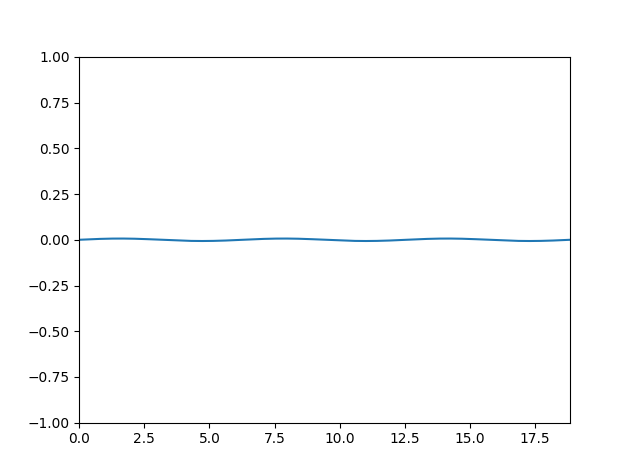

In [101]:
x = sp.symbols('x')
tijd = np.linspace(1, 2*np.pi, 100)
X = np.linspace(0, 6*np.pi, 400)

fig, ax = plt.subplots(1,1)
ax.set_xlim([0, 6*np.pi])
ax.set_ylim([-1, 1])

sinuskromme, = ax.plot([], [])


def animate(i):
    Y = np.exp(-tijd[i])*np.sin(X)
    sinuskromme.set_data(X, Y)

    
anim = animation.FuncAnimation(fig, animate, frames=100, interval=50)
plt.show()